In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('data.json')
df

,group_id,click_count,impression_count,conversion_count,date
0,52740,0,1,0,2024-01-22
1,52758,0,1,0,2024-01-22
2,64336,2,12,0,2024-01-22
3,186281,0,1,0,2024-01-22
4,52708,0,4,0,2024-01-22
...,...,...,...,...,...
56554,161436,1,7,0,2025-02-02
56555,52909,0,8,0,2025-02-02
56556,103359,0,3,0,2025-02-02
56557,1094,37,190,3,2025-02-02


In [3]:
# Making an aggregation right away
df = df.groupby('date').agg({
    'group_id': 'nunique',  # Count unique group_ids per date (optional, if needed)
    'click_count': 'sum',   # Sum the click_count for each date
    'impression_count': 'sum',  # Sum the impression_count for each date
    'conversion_count': 'sum'   # Sum the conversion_count for each date (target column)
}).reset_index()

df

,date,group_id,click_count,impression_count,conversion_count
0,2024-01-22,64,134,2815,4
1,2024-01-23,84,1531,9990,7
2,2024-01-24,73,1695,15717,18
3,2024-01-25,87,434,7232,3
4,2024-01-26,88,290,4912,5
...,...,...,...,...,...
365,2025-01-29,212,207,4648,45
366,2025-01-30,226,505,5280,69
367,2025-01-31,222,570,5107,75
368,2025-02-01,209,263,4866,73


# Data Visualization

Text(0.5, 1.0, 'Conversion Count')

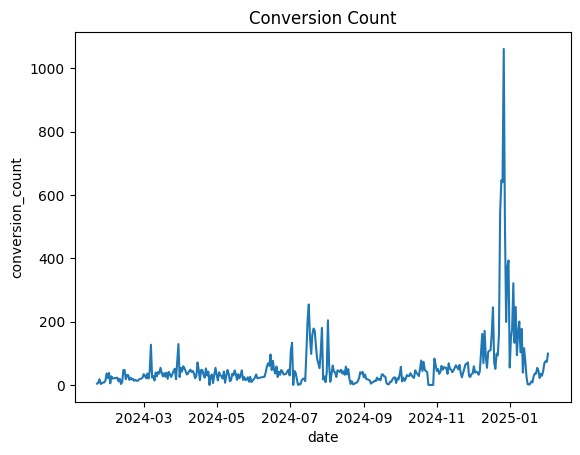

In [4]:
sns.lineplot(data = df,x = 'date',y = 'conversion_count')
plt.title('Conversion Count')

Text(0.5, 1.0, 'Click Count')

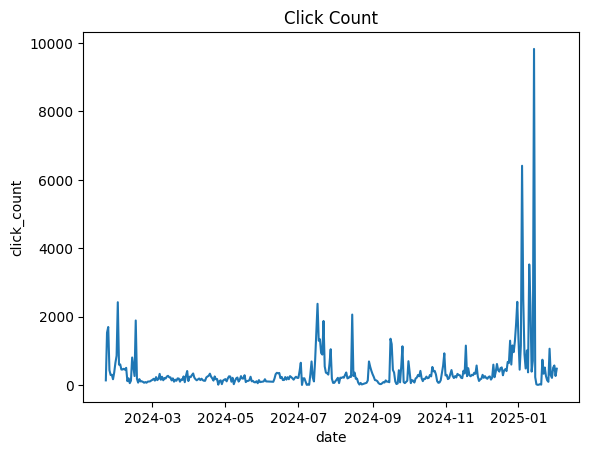

In [5]:
sns.lineplot(data = df,x = 'date',y = 'click_count')
plt.title('Click Count')

Text(0.5, 1.0, 'Impression Count')

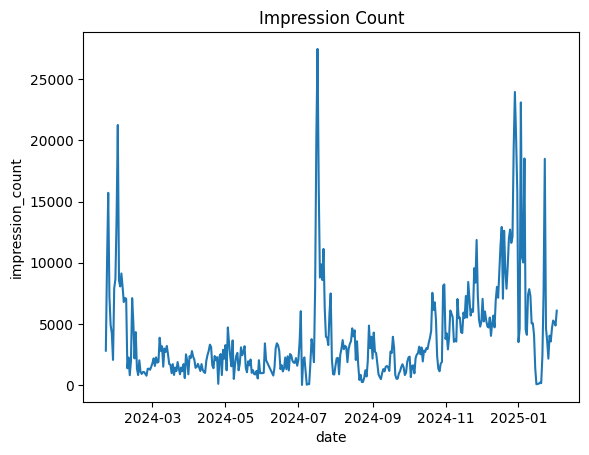

In [6]:
sns.lineplot(data = df,x = 'date',y = 'impression_count')
plt.title('Impression Count')

<Axes: >

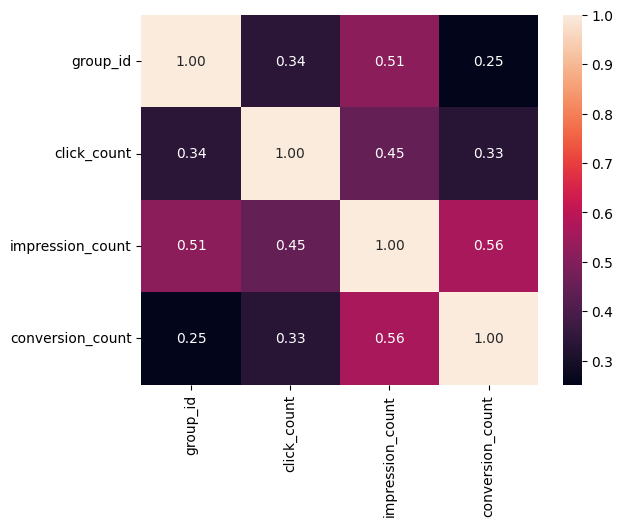

In [7]:
sns.heatmap(data = df.select_dtypes(include = ['int']).corr(),annot = True,fmt = '.2f')

# Feature Engineering

In [8]:
# Time based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# Turkish Holidays
holidays = ["2024-01-01", "2024-04-23", "2024-05-01", "2024-07-15", "2024-10-29"]
df["is_holiday"] = df["date"].astype(str).isin(holidays).astype(int)

# Lags
lags = [3, 7, 15]
for lag in lags:
    df[f"conversion_lag_{lag}"] = df["conversion_count"].shift(lag)

df


,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,NaN,NaN,NaN
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,NaN,NaN,NaN
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,NaN,NaN,NaN
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,NaN,NaN
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [9]:
# Since we don't have any information about previous days prior to first day we fill NaN's with 0's

df.fillna(0, inplace = True)
df

,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,0.0,0.0,0.0
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,0.0,0.0,0.0
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,0.0,0.0,0.0
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,0.0,0.0
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [20]:
from prophet import Prophet

# Define a prophet DataFrame with proper naming
df_prophet = df.rename(columns={"date": "ds", "conversion_count": "y"})

# Turn Date into date format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Create a prophet object
model = Prophet()

model.add_regressor('click_count')
model.add_regressor('month')
model.add_regressor('impression_count')
model.add_regressor('weekday')
model.add_regressor('dayofyear')
model.add_regressor('is_weekend')
model.add_regressor('is_holiday')

model.fit(df_prophet)

19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Make future dataframe 7 days long
future = model.make_future_dataframe(periods=7)

future['click_count'] = df['click_count'].iloc[-1]  
future['month'] = df['month'].iloc[-1]  
future['impression_count'] = df['impression_count'].iloc[-1] 
future['weekday'] = df['weekday'].iloc[-1]
future['dayofyear'] = df['dayofyear'].iloc[-1]
future['is_weekend'] = df['is_weekend'].iloc[-1]
future['is_holiday'] = df['is_holiday'].iloc[-1]
# Prediction
forecast = model.predict(future)

# 7 days forecasting
forecast_7_days = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_7_days


,ds,yhat,yhat_lower,yhat_upper
0,2024-01-22,37.376715,-48.519841,118.868911
1,2024-01-23,40.908455,-44.065084,134.602541
2,2024-01-24,43.682237,-38.233965,126.797301
3,2024-01-25,40.885552,-42.114615,137.596908
4,2024-01-26,52.208766,-30.448628,141.849096
...,...,...,...,...
372,2025-02-05,110.877181,24.917094,202.426748
373,2025-02-06,109.262145,17.352594,200.581623
374,2025-02-07,121.767009,24.380594,208.216282
375,2025-02-08,108.808411,16.857226,192.306134


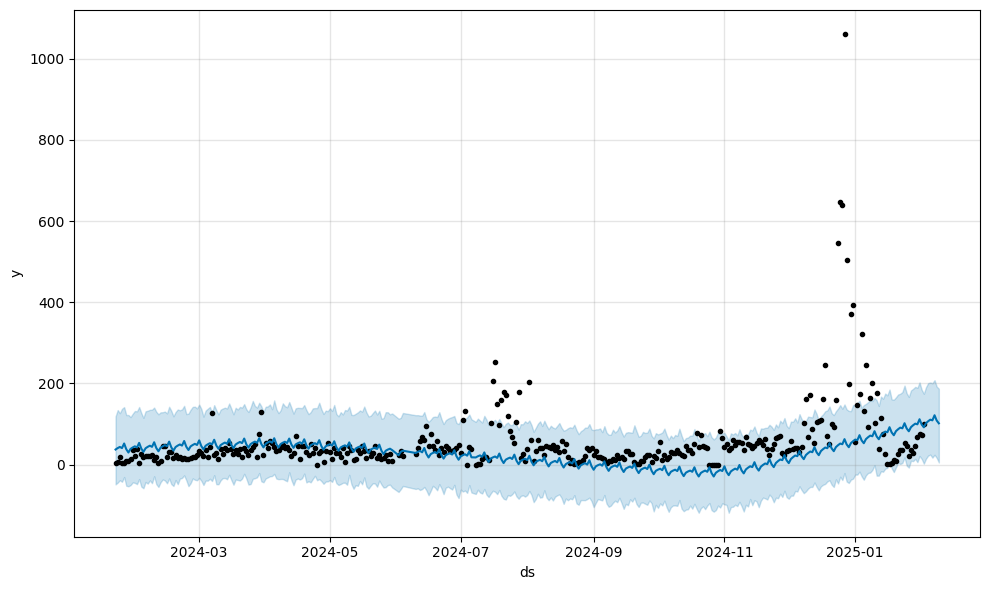

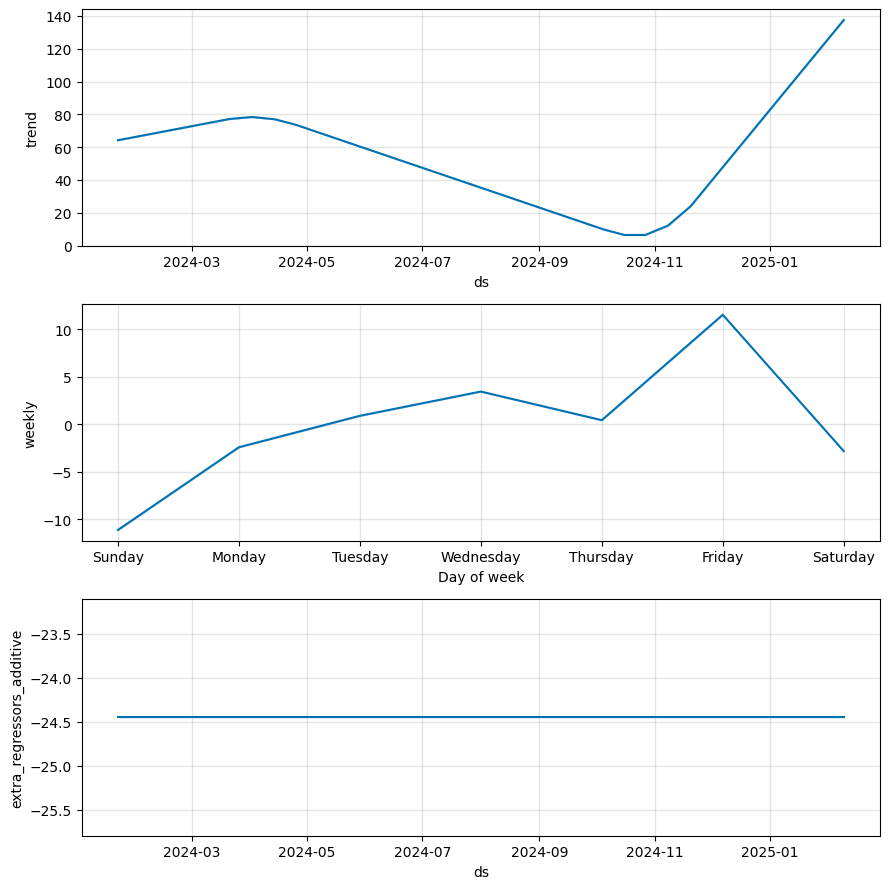

In [22]:
# Plot predictions
fig1 = model.plot(forecast)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
train = df_prophet
test = df_prophet.tail(7)  # For example, we can use the last 7 data points for testing

# The actual values for the last 7 days in the test set
actual_values = test['y']

# The predicted values from the Prophet model (forecasted)
predicted_values = forecast['yhat'].tail(7)

# 1. MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# 3. MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual_values,predicted_values)
print(f"MAPE: {mape}")

MAE: 48.106494327685375
RMSE: 53.48887041347386
MAPE: 1.1140039644405313
